# **FAKE NEWS CLASSIFIER WITH MACHINE LEARNING ALGORITHMS USING NLP**

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
# reading Fake news classifier dataset
df = pd.read_csv("Datasets/Fake News Classifier.csv")

In [3]:
# displaying first five records
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# displaying dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
# Dropping null values
df = df.dropna()

In [6]:
# dropping null values
df = df.dropna()

# Again checking for null values 
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
data = df.copy()

In [8]:
# resiting index after dropping some rows
data.reset_index(inplace = True)

In [9]:
df.reset_index(inplace = True)

In [10]:
# Checking null values
df.isnull().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

### **Splitting Feature matrix and Target Vector**

In [11]:
# Splitting feature matrix
X = df.drop("label", axis = 1)

In [12]:
# splitting target vector
y = df.label

### **Text Preprocessing**

In [13]:
# importing some specific libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
# making stemmer object
stemmer = PorterStemmer()

In [15]:
# list to store
corpus = []
for row in range(X.shape[0]):
    row = X["title"][row]    # Getting the row
    row = re.sub("[^a-zA-Z]", " ", row)   # keep only the alphabet characters
    row = row.lower()  # lowering the sentence
    words = row.split()  # splitting the sentence into words
    words = [stemmer.stem(word) for word in words if word not in stopwords.words("english")]  # removing unnecessary characters and apply stemming
    sentence = ' '.join(words)  # remaking sentence again from words
    corpus.append(sentence) # appending the sentence to the corpus

In [16]:
len(corpus) # length of corpus

18285

### **Word Embidding**

In [17]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
# creating vector object
vector = CountVectorizer(ngram_range=(1, 3))

In [19]:
# converting the corpus into vectors
VX = vector.fit_transform(corpus)

In [20]:
vector.get_feature_names()[:10]

/home/kamipakistan/anaconda3/envs/AI/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aa ball',
 'aaa',
 'aaa safeti',
 'aaa safeti foundat',
 'aap',
 'aap punjab',
 'aap punjab cm',
 'aap tata',
 'aap tata son']

In [36]:
vector.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

### **Splitting the dataset into Train and testing splits**

In [21]:
# importing libraries
from sklearn.model_selection import train_test_split

In [22]:
XTrain, XTest, yTrain, yTest = train_test_split(VX, y, random_state=1, test_size=0.3)

In [23]:
# shape of the training sets
print(XTrain.shape)
print(yTrain.shape)

(12799, 210383)
(12799,)


### **Model building**

In [24]:
# importing model
from sklearn.naive_bayes import MultinomialNB

In [25]:
# creating model object
model = MultinomialNB()

In [26]:
# fitting the model
model.fit(XTrain, yTrain)

MultinomialNB()

In [27]:
# making prediction on test set
yPred = model.predict(XTest)

### **Evaluatioin**

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
# Classification report
report = classification_report(yTest, yPred)

In [30]:
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3126
           1       0.91      0.89      0.90      2360

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486



In [31]:
# confusion matrix
matrix  = confusion_matrix(yTest, yPred)

In [32]:
matrix

array([[2915,  211],
       [ 260, 2100]])

<AxesSubplot:>

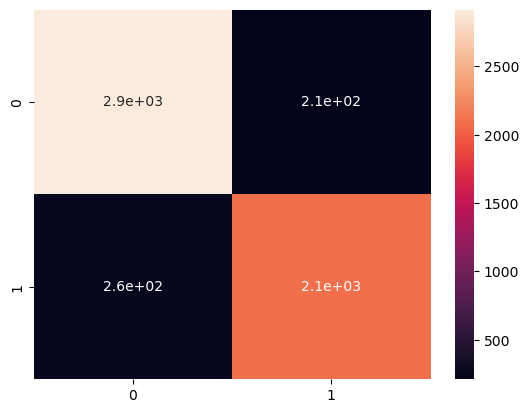

In [33]:
# heatmap
sns.heatmap(matrix, annot = True)

In [34]:
# accuracy
print(accuracy_score(yTest, yPred))

0.9141450966095516
